In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.datasets import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
%matplotlib inline

In [2]:
#sns.set(style="dark", palette="muted", color_codes=True)

# 1. 生成数据

数据为$y=\sin(x)+\epsilon$, $\epsilon \sim N(0, \sigma)$

In [3]:
n_train_sample = 10
n_test_sample = 100
sigma = 0.15

np.random.seed(0)

x_train = np.linspace(0.0, 1.0, n_train_sample).reshape(-1,1)
y_train = np.sin(x_train*2*np.pi)+np.random.normal(0.0, sigma, x_train.shape)

x_test = np.random.uniform(0.0, 1.0, n_test_sample).reshape(-1,1)
y_test = np.sin(x_test*2*np.pi)+np.random.normal(0.0, sigma, x_test.shape)

x_ground_truth = np.linspace(0.0, 1.0, 1000).reshape(-1,1)
y_ground_truth = np.sin(x_ground_truth*2*np.pi)

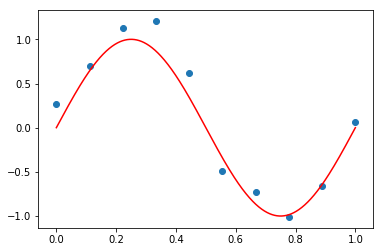

In [4]:
plt.scatter(x_train, y_train)
plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.savefig("orig.pdf")

# 2. 过拟合

MSE_train_set = 0.32309893097509385
 MSE_test_set = 0.24574567693348567


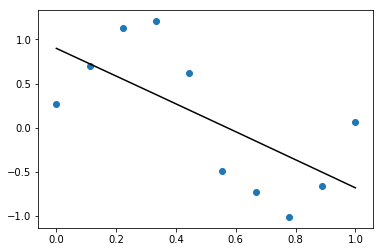

In [5]:
degree = 2
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
#plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
plt.savefig('underfit.pdf')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 0.010127368728737792
 MSE_test_set = 0.03605368093990212


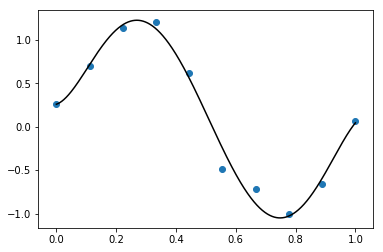

In [6]:
degree = 5
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
# plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
plt.savefig('normal.pdf')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

MSE_train_set = 3.464227906621645e-22
 MSE_test_set = 0.26065456904276574


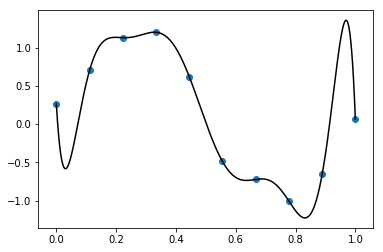

In [7]:
degree = 9
poly = PolynomialFeatures(degree, include_bias=False)
x_train_tf = poly.fit_transform(x_train)
model = LinearRegression()
model.fit(x_train_tf, y_train)

y_predicted = model.predict(poly.fit_transform(x_test))

plt.scatter(x_train, y_train)
#plt.plot(x_ground_truth, y_ground_truth, color = 'red')
plt.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
plt.savefig('overfit.pdf')

MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
print("MSE_train_set = %s\n MSE_test_set = %s" % (MSE_train_set, MSE_test_set))

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.323,0.246,-1.578,nan,nan,nan,nan,nan,nan,nan,nan
2,0.323,0.246,-1.564,-0.015,nan,nan,nan,nan,nan,nan,nan
3,0.031,0.054,11.204,-33.666,22.434,nan,nan,nan,nan,nan,nan
4,0.029,0.053,9.641,-25.774,9.776,6.329,nan,nan,nan,nan,nan
5,0.010,0.036,1.128,45.193,-190.824,236.262,-91.973,nan,nan,nan,nan
6,0.008,0.038,-3.158,98.067,-418.398,676.042,-483.165,130.397,nan,nan,nan
7,0.007,0.036,3.935,-18.972,275.657,-1286.441,2378.707,-1946.481,593.394,nan,nan
8,0.004,0.057,26.546,-474.956,3714.951,-14260.986,29390.464,-33460.198,19887.506,-4823.528,nan
9,0.000,0.261,-66.129,1665.688,-15566.614,76321.234,-217389.151,370626.477,-372051.470,202540.702,-46080.940


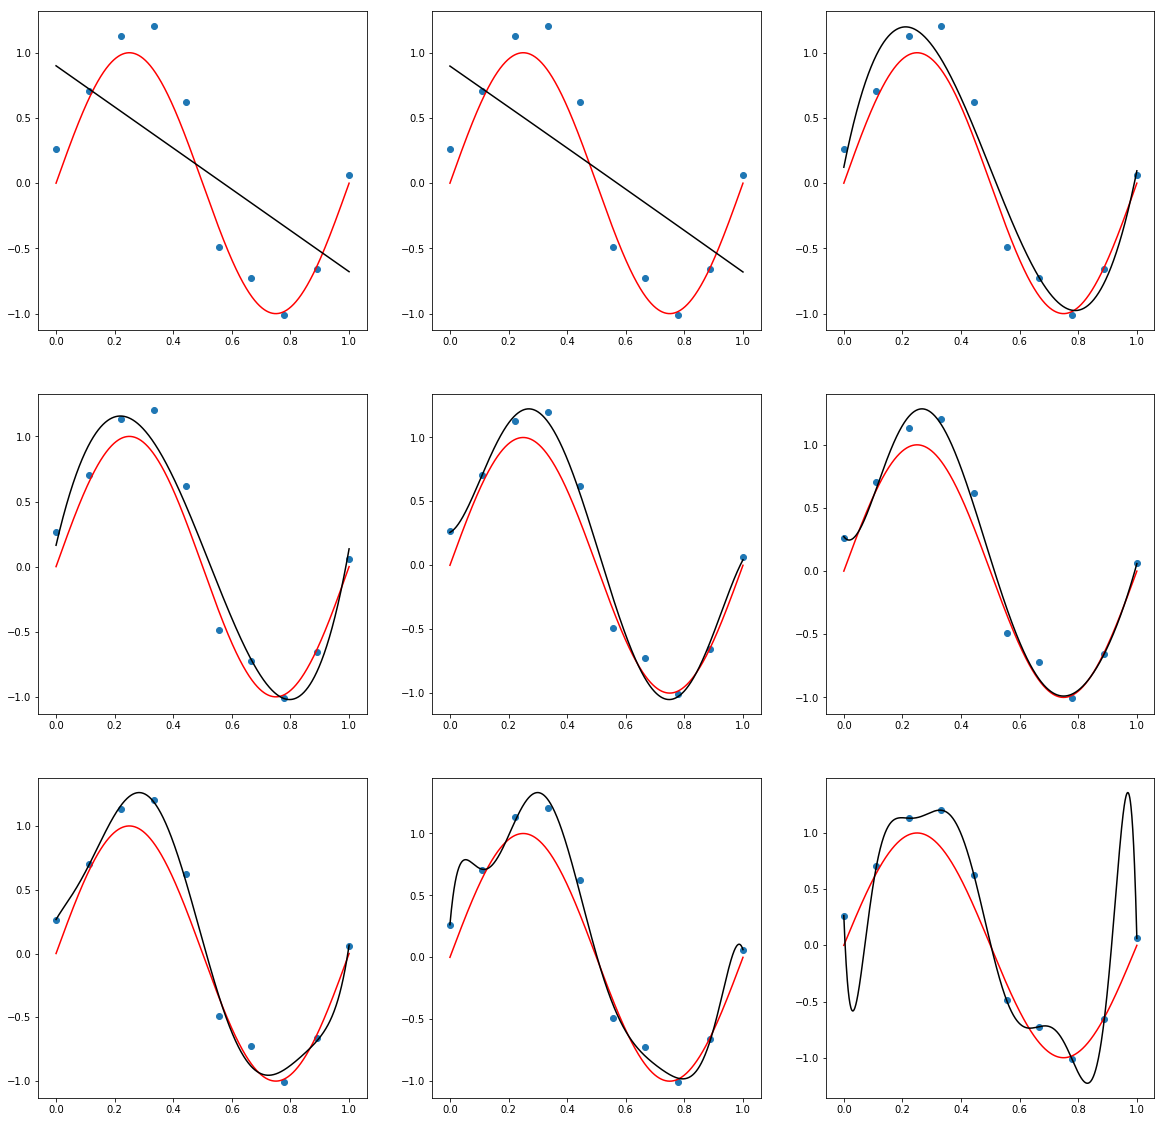

In [8]:
with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train)
        model = LinearRegression()
        model.fit(x_train_tf, y_train)

        MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train, y_train)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

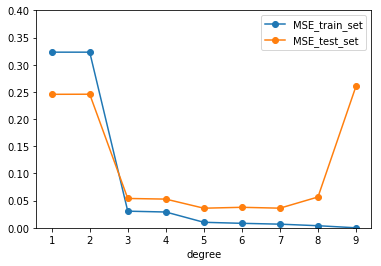

In [9]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

# 3. 解决过拟合
## 方法一. 增加数据量

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.216,0.224,-1.920,nan,nan,nan,nan,nan,nan,nan,nan
2,0.216,0.224,-1.913,-0.007,nan,nan,nan,nan,nan,nan,nan
3,0.026,0.032,11.827,-34.391,22.923,nan,nan,nan,nan,nan,nan
4,0.026,0.032,11.463,-32.750,20.369,1.277,nan,nan,nan,nan,nan
5,0.022,0.024,4.894,13.415,-102.923,140.050,-55.509,nan,nan,nan,nan
6,0.022,0.024,5.479,7.529,-79.322,95.750,-16.510,-13.000,nan,nan,nan
7,0.022,0.024,4.923,15.096,-121.512,211.979,-184.023,108.022,-34.578,nan,nan
8,0.022,0.024,5.135,11.360,-93.978,108.462,31.589,-143.703,119.583,-38.540,nan
9,0.022,0.025,8.465,-62.942,603.966,-3305.743,9610.138,-16125.837,15784.860,-8362.755,1849.826


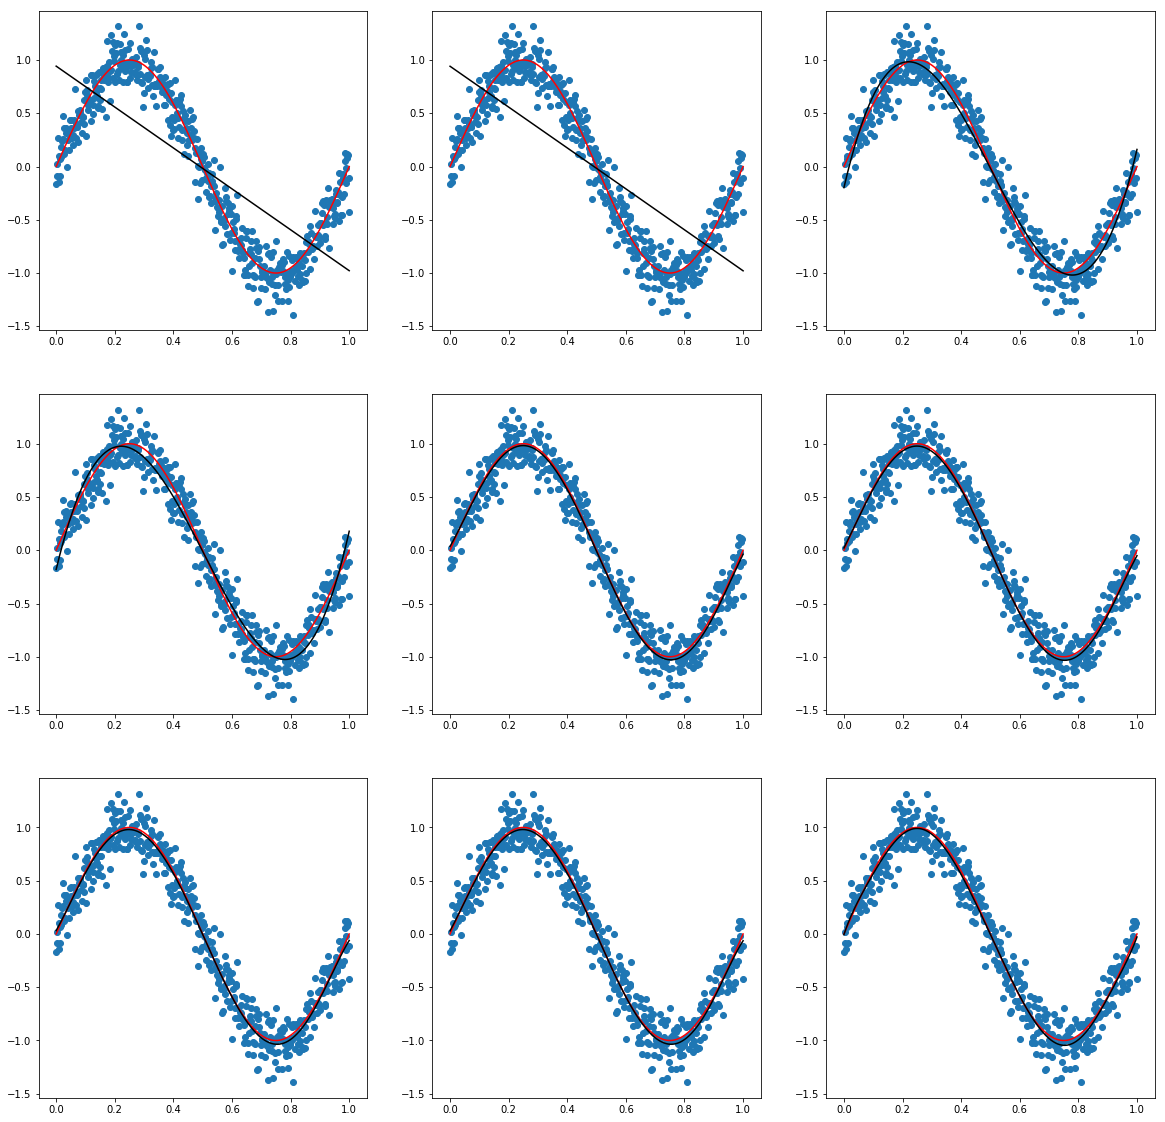

In [10]:
n_train_sample_large = 500

x_train_large = np.linspace(0.0, 1.0, n_train_sample_large).reshape(-1,1)
y_train_large = np.sin(x_train_large*2*np.pi)+np.random.normal(0.0, sigma, x_train_large.shape)

with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train_large)
        model = LinearRegression()
        model.fit(x_train_tf, y_train_large)

        MSE_train_set = mean_squared_error(y_train_large, model.predict(poly.transform(x_train_large)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train_large, y_train_large)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

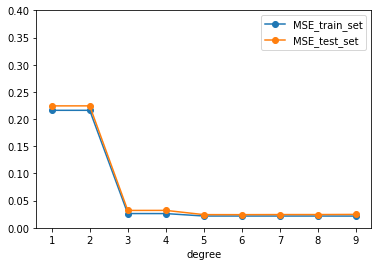

In [11]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

## 方法二：正则化

,MSE_train_set,MSE_test_set,w0,w1,w2,w3,w4,w5,w6,w7,w8
degree,,,,,,,,,,,
1,0.323,0.246,-1.578,nan,nan,nan,nan,nan,nan,nan,nan
2,0.323,0.246,-1.557,-0.021,nan,nan,nan,nan,nan,nan,nan
3,0.039,0.055,8.897,-27.843,18.654,nan,nan,nan,nan,nan,nan
4,0.032,0.053,7.341,-16.701,-2.442,11.665,nan,nan,nan,nan,nan
5,0.034,0.056,6.904,-15.264,-1.954,7.054,3.138,nan,nan,nan,nan
6,0.031,0.052,7.116,-15.464,-3.196,7.417,6.910,-2.914,nan,nan,nan
7,0.026,0.048,7.224,-14.808,-5.117,5.948,8.686,3.798,-5.872,nan,nan
8,0.022,0.044,7.142,-13.720,-6.366,3.993,8.212,6.425,0.823,-6.666,nan
9,0.020,0.042,6.982,-12.745,-6.855,2.510,7.046,6.762,3.495,-1.163,-6.202


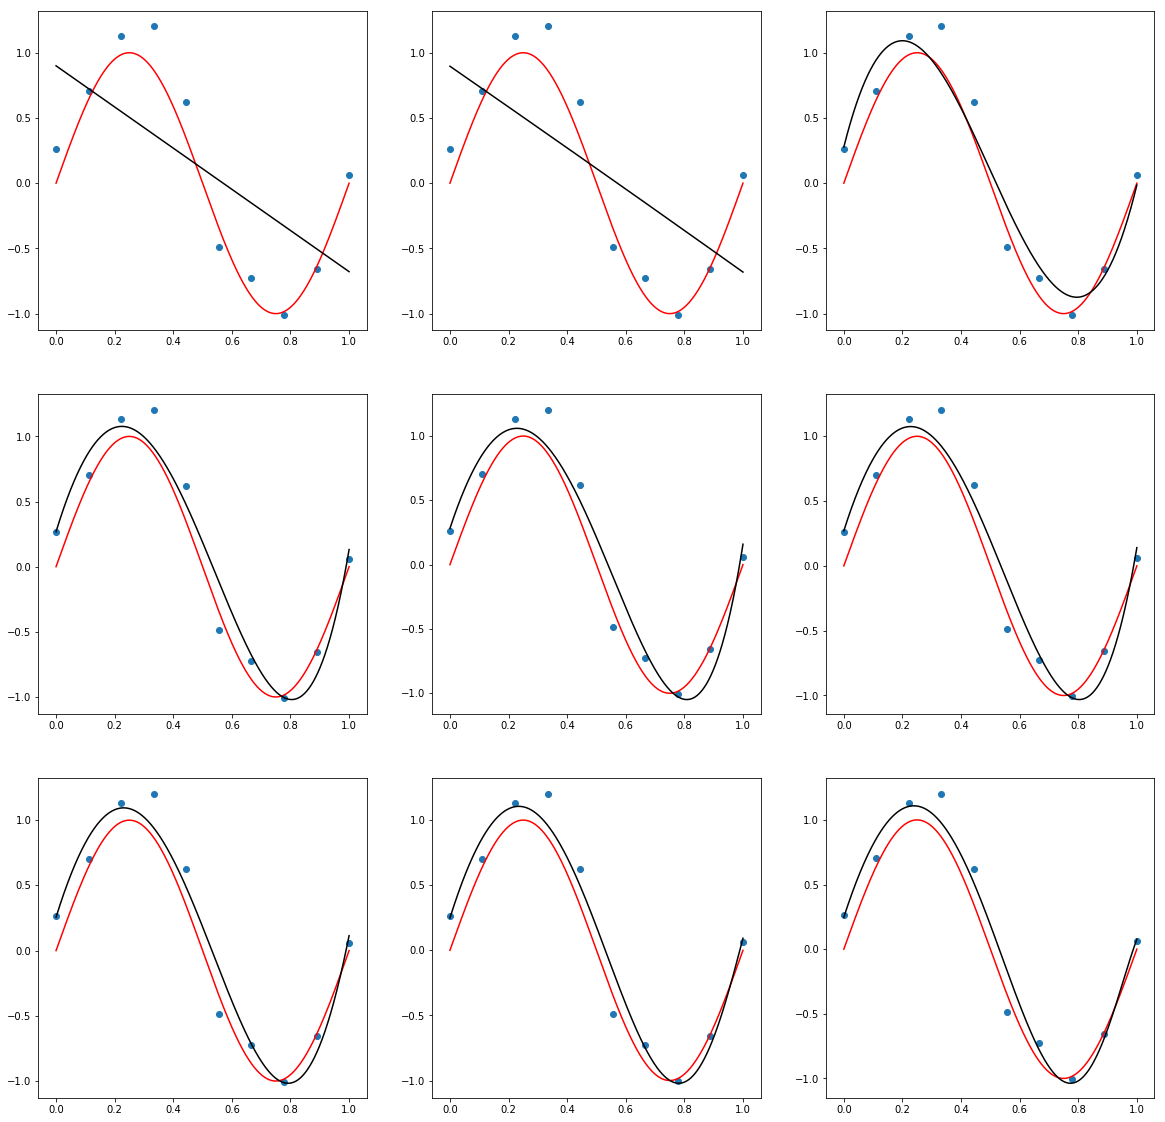

In [12]:
with plt.rc_context(rc={"figure.figsize":(20.0,20.0)}):
    pd.set_option('display.float_format', lambda x: '%.3f' % x) # 设置pandas小数打印精度

    df = pd.DataFrame(np.nan, index=pd.Index(range(1,10), name='degree'), 
                      columns=["MSE_train_set", "MSE_test_set"] + list(map(lambda x:"w%d" % x, range(0,9))))

    #fig = plt.figure()

    for degree in range(1, 10):
        poly = PolynomialFeatures(degree, include_bias=False)
        x_train_tf = poly.fit_transform(x_train)
        model = Ridge(alpha=math.exp(-8))
        model.fit(x_train_tf, y_train)

        MSE_train_set = mean_squared_error(y_train, model.predict(poly.transform(x_train)))
        MSE_test_set = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
        df.loc[degree, "MSE_train_set"] = MSE_train_set
        df.loc[degree, "MSE_test_set"] = MSE_test_set
        for i in range(len(model.coef_[0])):
            df.loc[degree, "w%d" % i] = model.coef_[0][i]

        #plot
        ax = plt.subplot(3,3,degree)
        ax.scatter(x_train, y_train)
        ax.plot(x_ground_truth, y_ground_truth, color = 'red')
        ax.plot(x_ground_truth, model.predict(poly.transform(x_ground_truth)), color='black')
df

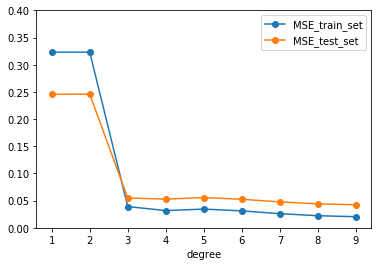

In [13]:
df[["MSE_train_set", "MSE_test_set"]].plot(ylim = (0.0, 0.4), marker = 'o')

正则化参数对w与误差的影响

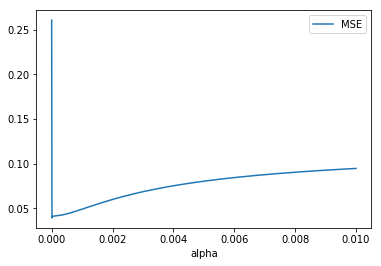

In [14]:
df = pd.DataFrame(columns=["alpha"]+list(map(lambda x:"w%d" % x, range(0,9)))+["MSE"])

for i, alpha in enumerate(np.linspace(0, 0.01, 1000)):
    degree = 9
    poly = PolynomialFeatures(degree, include_bias=False)
    x_train_tf = poly.fit_transform(x_train)
    model = Ridge(alpha=alpha)
    model.fit(x_train_tf, y_train)

    MSE = mean_squared_error(y_test, model.predict(poly.transform(x_test)))
    
    df.loc[i, "alpha"] = alpha
    for j in range(len(model.coef_[0])):
        df.loc[i, "w%d" % j] = model.coef_[0][j]
    df.loc[i, "MSE"] = MSE

df.plot(x='alpha', y='MSE')